In [3]:
import tweepy
import pandas as pd
from gensim.models import doc2vec
import umap
import string
import nltk
from nltk.stem import WordNetLemmatizer
import seaborn as sns

In [4]:
def preprocess(text):
    """Preprocess function to remove punctuation, @ and more

    Args:
        text (_type_): _description_

    Returns:
        _type_: _description_
    """
    # Remove hashtags, mentions, and URLs
    print(text)
    text = ' '.join(word for word in text.split() if not word.startswith('#') and not word.startswith('@') and not word.startswith('http'))
    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    # Tokenize and lemmatize
    tokens = nltk.word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

<AxesSubplot: >

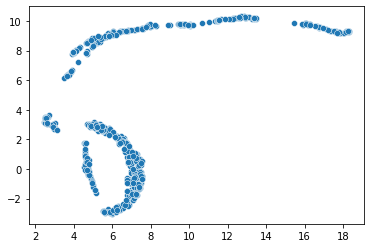

In [14]:
# Authenticate with Twitter API
auth = auth = tweepy.OAuth2BearerHandler("AAAAAAAAAAAAAAAAAAAAANMbkgEAAAAAF6hgiRz3HQvJSicgH%2B80AXoEY%2Fg%3DtPa8gawDk48qlx8YIRtO940oHKndrxK9RotxWDpRbNY7RED9Nf")
api = tweepy.API(auth)

# Query Twitter API for pain-related tweets
query = 'IASP'
tweets = tweepy.Cursor(api.search_tweets, q=query).items(1000)

# Store tweets in a Pandas dataframe
tweet_list = []
for tweet in tweets:
    tweet_list.append({'text': tweet.text, 'created_at': tweet.created_at, "coordinates": tweet.coordinates, "retweet_count": tweet.geo, "user": tweet.user})
df = pd.DataFrame(tweet_list)

# Train doc2vec model on tweets
documents = [doc2vec.TaggedDocument(preprocess(tweet), [i]) for i, tweet in enumerate(df['text'])]
model = doc2vec.Doc2Vec(documents, vector_size=50, window=2, min_count=1, workers=4)

# Transform tweet vectors using UMAP
vectors = [model.infer_vector(preprocess(tweet)) for tweet in df['text']]
umap_model = umap.UMAP(n_components=2, n_neighbors=50)
umap_vectors = umap_model.fit_transform(vectors)

# Plot tweet clusters using UMAP vectors
sns.scatterplot(x = umap_vectors[:, 0], y = umap_vectors[:, 1])

In [15]:
# Think about what you can do with these data

,text,created_at,coordinates,retweet_count,user
0,New TSS ALERT:IASP 33 mirror copy storage thre...,2023-01-09 22:32:47+00:00,None,None,User(_api=<tweepy.api.API object at 0x2b301f49...
1,RT @INPrincipals: Governor Holcomb's proposed ...,2023-01-09 22:13:55+00:00,None,None,User(_api=<tweepy.api.API object at 0x2b301f49...
2,New TSS ALERT:IASP 33 mirror copy storage thre...,2023-01-09 21:33:15+00:00,None,None,User(_api=<tweepy.api.API object at 0x2b301f49...
3,2. La definición actual de dolor de la IASP pr...,2023-01-09 20:34:43+00:00,None,None,User(_api=<tweepy.api.API object at 0x2b301f49...
4,New TSS ALERT:IASP 33 mirror copy storage thre...,2023-01-09 20:32:13+00:00,None,None,User(_api=<tweepy.api.API object at 0x2b301f49...
...,...,...,...,...,...
531,RT @Khalid_Al_Kamal: راسة نشرت عام 2002م بعنوا...,2022-12-30 22:24:06+00:00,None,None,User(_api=<tweepy.api.API object at 0x2b301f49...
532,New TSS ALERT:IASP 33 mirror copy storage thre...,2022-12-30 22:04:44+00:00,None,None,User(_api=<tweepy.api.API object at 0x2b301f49...
533,RT @MarcJBryant: Shout out to the angels answe...,2022-12-30 21:19:51+00:00,None,None,User(_api=<tweepy.api.API object at 0x2b301f49...
534,New TSS ALERT:IASP 33 mirror copy storage thre...,2022-12-30 21:03:29+00:00,None,None,User(_api=<tweepy.api.API object at 0x2b301f49...
